In [2]:
import dispersereader as dsp

In [3]:
### Codigo para testear la rutina:
filename_s3 =  "sussing_125.z0.000_filt_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl"
filename_s5 = "sussing_125.z0.000_filt_NP.a.ND.NDnet_s5.up.NDskl.a.NDskl"
filename_s10 = "sussing_125.z0.000_filt_NP.a.ND.NDnet_s10.up.NDskl.a.NDskl"


#dinfo = get_datainfo
d = dsp.read_NDskl_ascii(filename_s3)
s = dsp.read_NDskl_ascii(filename_s5)
a = dsp.read_NDskl_ascii(filename_s10)

In [4]:
d.keys()
s.keys()
a.keys()


dict_keys(['METADATA', 'CRITICAL_POINTS', 'FILAMENTS', 'CRITICAL_POINTS_DATA', 'FILAMENTS_DATA'])

In [5]:
d

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 9857,
  'CriticalPoints_NumFils': 19550,
  'Filaments': 9775,
  'Filaments_NumPoints': 85845,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':       type      Pos0      Pos1      Pos2         value  pairID  boundary  \
  0        3  463427.0  999625.0  425189.0  5.833100e-08    3557         0   
  1        3  467547.0  898955.0  383675.0  4.575580e-08    2884         0   
  2        3  450204.0  889898.0  389081.0  2.364180e-07    4571         0   
  3        3  463818.0  920946.0  371704.0  7.509110e-08    4667

In [6]:
s

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 1563,
  'CriticalPoints_NumFils': 3076,
  'Filaments': 1538,
  'Filaments_NumPoints': 80715,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':       type      Pos0      Pos1      Pos2         value  pairID  boundary  \
  0        3  466407.0  917910.0  382319.0  5.099160e-07     545         0   
  1        3  457912.0  914623.0  370128.0  7.236150e-07     546         0   
  2        3  448145.0  891320.0  390843.0  2.541000e-07     543         0   
  3        3  448136.0  935829.0  381617.0  4.776860e-07     254 

In [7]:
a

{'METADATA': {'Ndims': 3,
  'BBOX_min': [0.0, 0.0, 0.0],
  'BBOX_max': [1000000.0, 1000000.0, 1000000.0],
  'CriticalPoints': 9,
  'CriticalPoints_NumFils': 2,
  'Filaments': 1,
  'Filaments_NumPoints': 912,
  'CriticalPointsData_NF': 9,
  'CriticalPointsData_Fields': ['persistence_ratio',
   'persistence_nsigmas',
   'persistence',
   'persistence_pair',
   'parent_index',
   'parent_log_index',
   'log_field_value',
   'field_value',
   'cell'],
  'FilamentsData_NF': 5,
  'FilamentsData_Fields': ['field_value',
   'orientation',
   'cell',
   'log_field_value',
   'type']},
 'CRITICAL_POINTS': {'CPinfo':    type      Pos0      Pos1      Pos2         value  pairID  boundary  nfil  \
  0     3  466126.0  915882.0  391797.0  2.945050e-05       0         0     1   
  1     2  480499.0  889520.0  482092.0  4.698180e-10       1         2     1   
  2     1  445391.0  915029.0  468020.0  1.241660e-11       7         2     0   
  3     1  448982.0  889672.0  468853.0  1.052420e-11       5   

In [8]:
import matplotlib.pyplot as plt

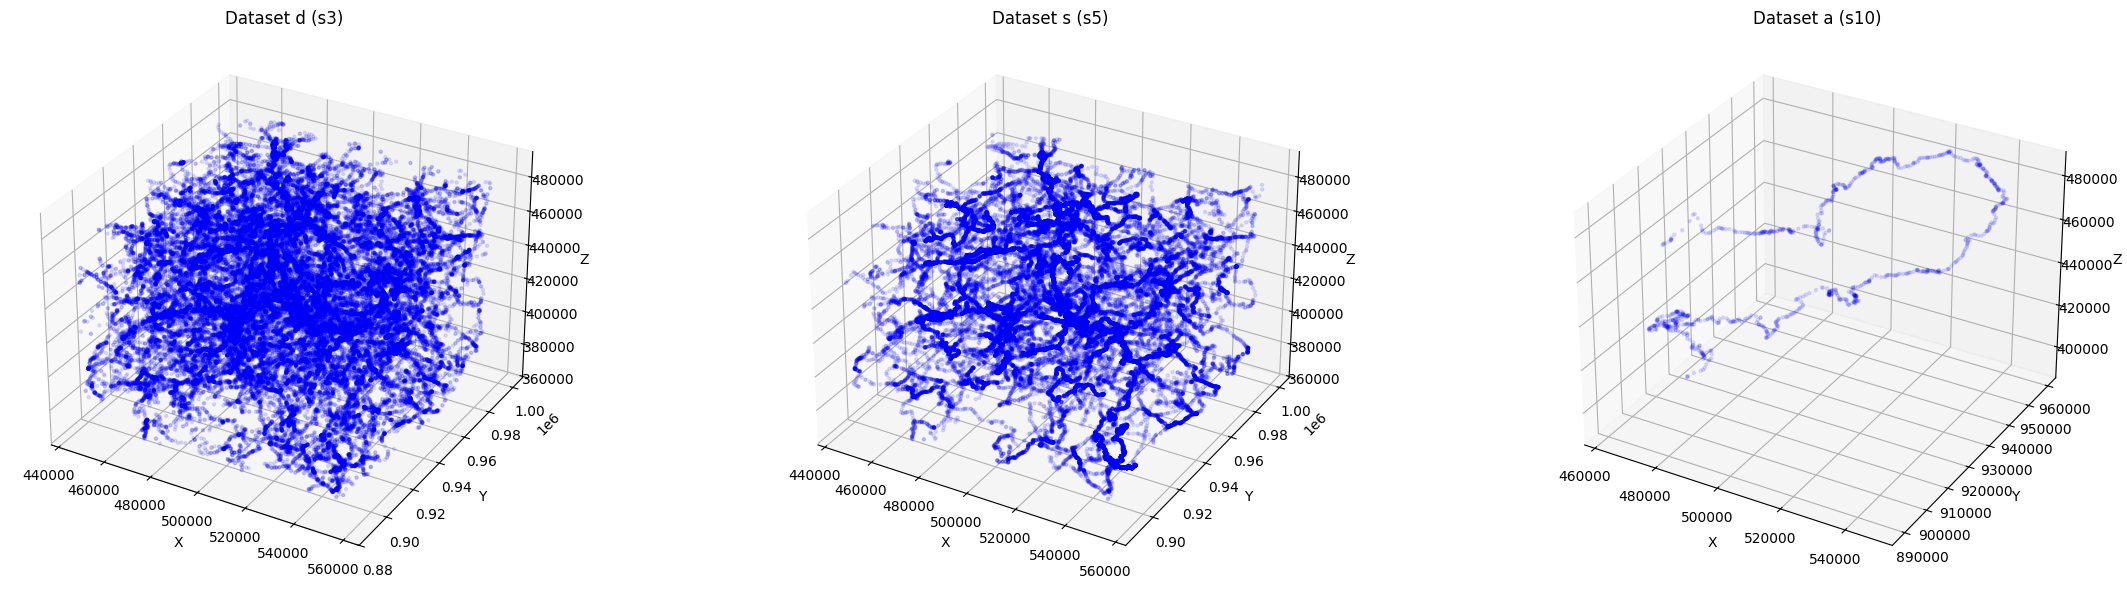

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y 3 ejes 3D uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(24, 6), subplot_kw={'projection': '3d'})

# Data
datasets = [d, s, a]
titles = ['Dataset d (s3)', 'Dataset s (s5)', 'Dataset a (s10)']

for i, ax in enumerate(axes):
    dataset = datasets[i]
    title = titles[i]

    # Extraer coordenadas X, Y, Z
    x = dataset["FILAMENTS"]["SamplingPoints"][:, 0]
    y = dataset["FILAMENTS"]["SamplingPoints"][:, 1]
    z = dataset["FILAMENTS"]["SamplingPoints"][:, 2]

    # Dibujar los puntos en 3D
    ax.scatter(x, y, z, c='b', alpha=0.1, marker='.')

    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# Mostrar la figura
plt.tight_layout()
plt.show()


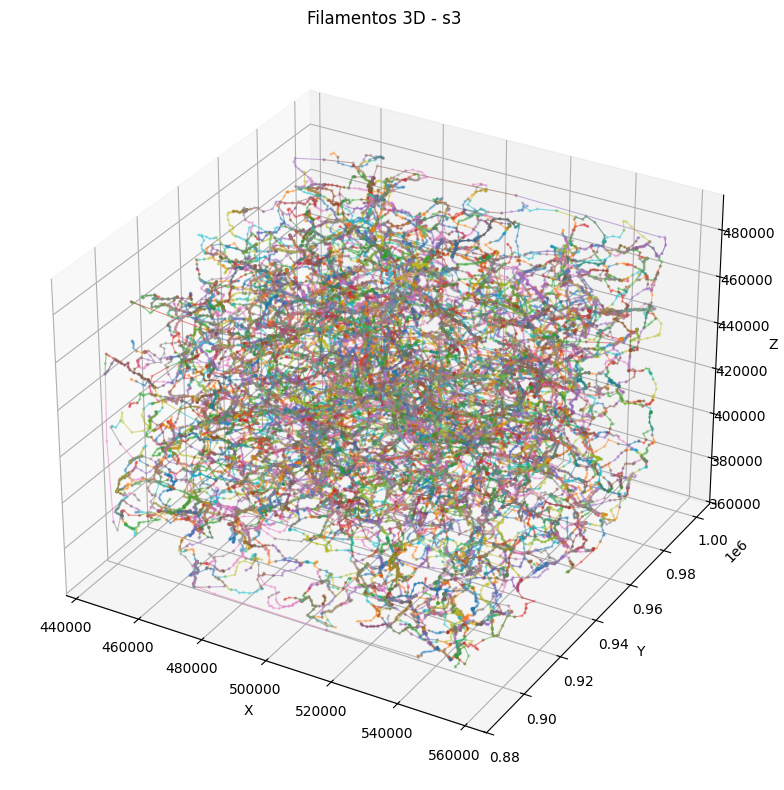

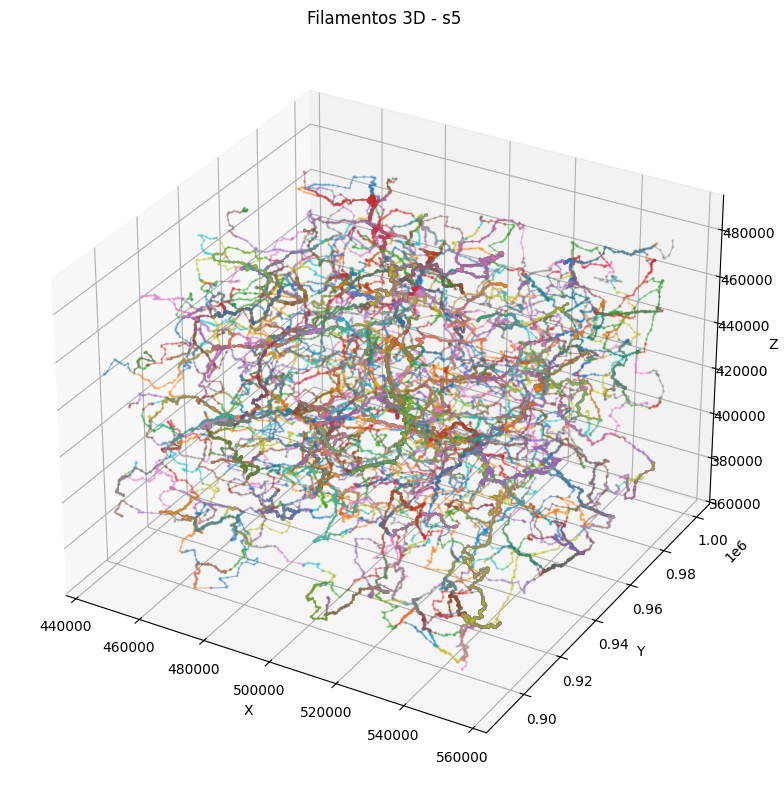

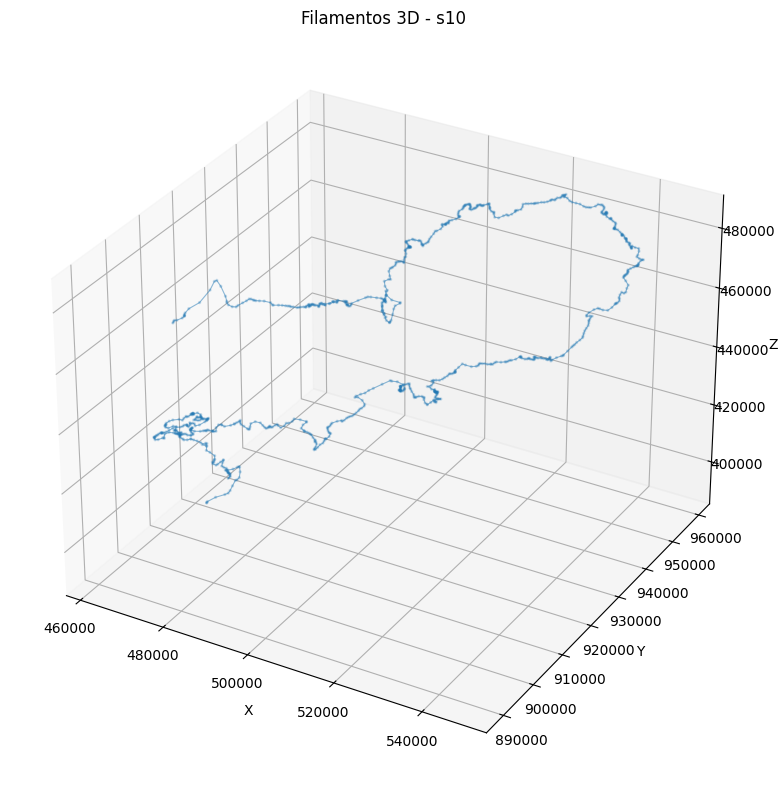

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Función para graficar filamentos 3D
def plot_filaments_3d(dataset, nombre_dataset):
    if 'FILAMENTS' in dataset and isinstance(dataset['FILAMENTS'], dict):
        filamentos_data = dataset['FILAMENTS']
        if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
            sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
            finfo = filamentos_data["Finfo"]                     # DataFrame con info de los filamentos

            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            for index, row in finfo.iterrows():
                start = row["firstIndex"]
                size = row["nSamp"]

                if start < 0 or size < 0 or start + size > len(sampling_points):
                    print(f"Warning: Índices inválidos para el filamento {index} en {nombre_dataset}.")
                    continue

                filament_points = sampling_points[start : start + size]
                if filament_points.shape[0] < 2:
                    continue

                x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]
                ax.plot(x, y, z, linewidth=0.8, alpha=0.5)
                ax.scatter(x, y, z, alpha=0.2, s=2)

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.set_title(f"Filamentos 3D - {nombre_dataset}")
            plt.tight_layout()
            plt.savefig(f"filamentos_3d_{nombre_dataset}.png")
            plt.show()
        else:
            print(f"Faltan claves 'SamplingPoints' o 'Finfo' en {nombre_dataset}.")
    else:
        print(f"Estructura inválida en {nombre_dataset}.")

# Llamar a la función para cada dataset
plot_filaments_3d(d, "s3")
plot_filaments_3d(s, "s5")
plot_filaments_3d(a, "s10")



In [10]:
print(type(d["FILAMENTS"]["SamplingPoints"]))
print(d["FILAMENTS"]["SamplingPoints"].shape)
print(d["FILAMENTS"].keys())
print(type(s["FILAMENTS"]["SamplingPoints"]))
print(s["FILAMENTS"]["SamplingPoints"].shape)
print(s["FILAMENTS"].keys())
print(type(a["FILAMENTS"]["SamplingPoints"]))
print(a["FILAMENTS"]["SamplingPoints"].shape)
print(a["FILAMENTS"].keys())

<class 'numpy.ndarray'>
(85845, 3)
dict_keys(['Finfo', 'SamplingPoints'])
<class 'numpy.ndarray'>
(80715, 3)
dict_keys(['Finfo', 'SamplingPoints'])
<class 'numpy.ndarray'>
(912, 3)
dict_keys(['Finfo', 'SamplingPoints'])


In [11]:
print(d["FILAMENTS"]["Finfo"].columns)
print(d["FILAMENTS"]["Finfo"].iloc[0])
print(s["FILAMENTS"]["Finfo"].columns)
print(s["FILAMENTS"]["Finfo"].iloc[0])
print(a["FILAMENTS"]["Finfo"].columns)
print(a["FILAMENTS"]["Finfo"].iloc[0])

Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1           2556
CP2           1885
nSamp            9
firstIndex       0
Name: 0, dtype: int64
Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1           236
CP2           161
nSamp          48
firstIndex      0
Name: 0, dtype: int64
Index(['CP1', 'CP2', 'nSamp', 'firstIndex'], dtype='object')
CP1             1
CP2             0
nSamp         912
firstIndex      0
Name: 0, dtype: int64


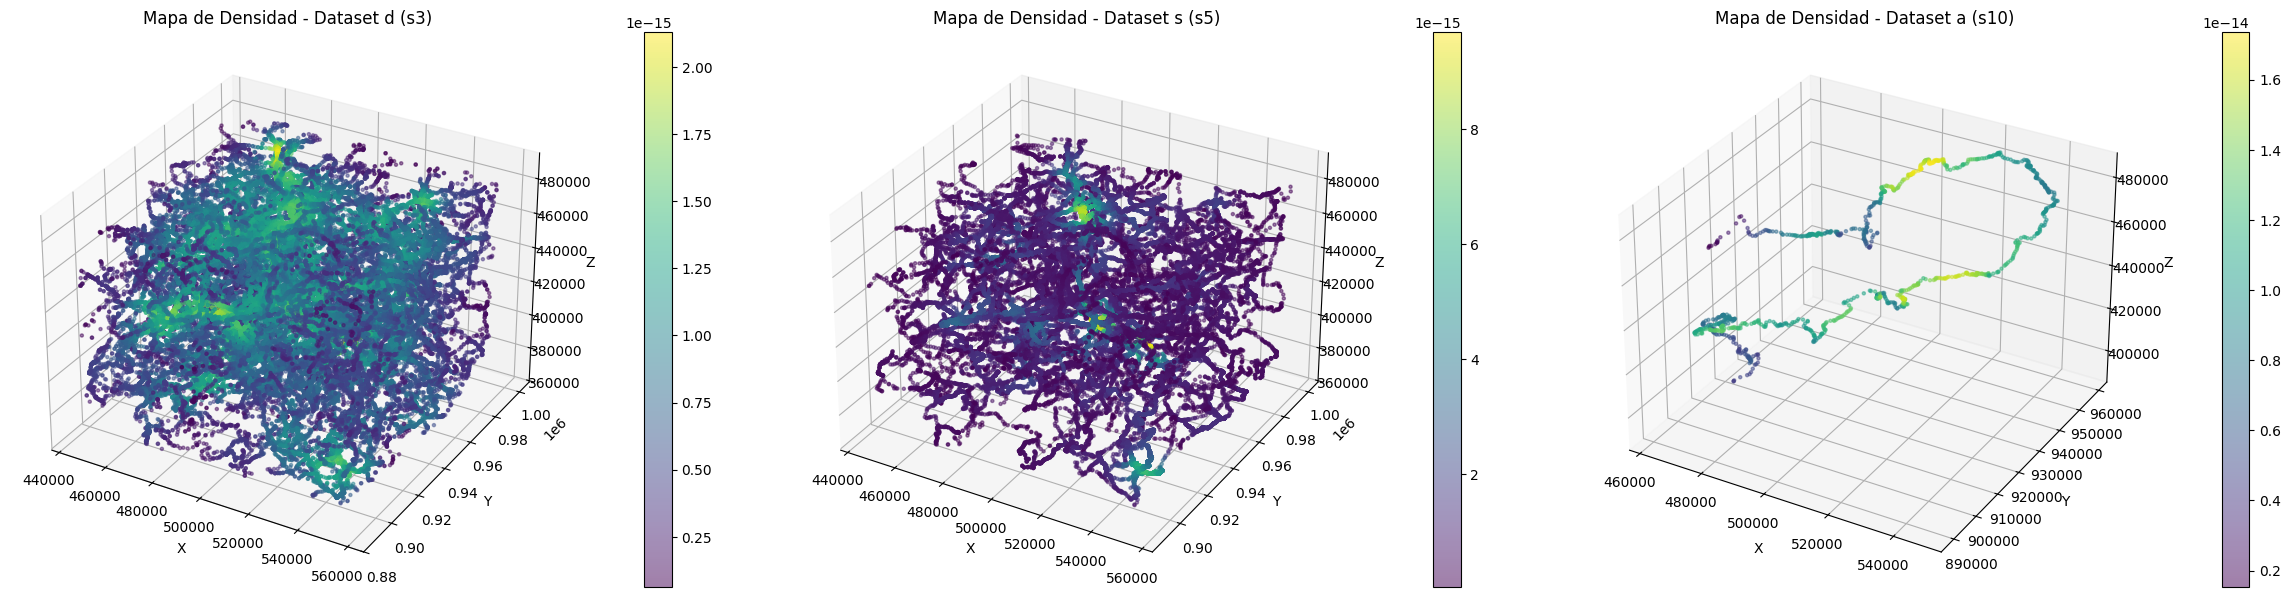

In [12]:


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Crear la figura y 3 ejes 3D uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(24, 6), subplot_kw={'projection': '3d'})

# Data
datasets = [d, s, a]
titles = ['Mapa de Densidad - Dataset d (s3)', 'Mapa de Densidad - Dataset s (s5)', 'Mapa de Densidad - Dataset a (s10)']

for i, ax in enumerate(axes):
    dataset = datasets[i]
    title = titles[i]

    # Extraer coordenadas X, Y, Z
    x = dataset["FILAMENTS"]["SamplingPoints"][:, 0]
    y = dataset["FILAMENTS"]["SamplingPoints"][:, 1]
    z = dataset["FILAMENTS"]["SamplingPoints"][:, 2]

    # Combinar coordenadas en un array 3D
    data = np.vstack([x, y, z])

    # Calcular la densidad usando KDE
    kde = gaussian_kde(data)

    # Evaluar la densidad en los puntos originales
    density = kde(data)

    # Ordenar los puntos por densidad para un mejor visualización del mapa de color
    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]

    # Dibujar los puntos con color basado en la densidad
    scatter = ax.scatter(x, y, z, c=density, cmap='viridis', marker='.', alpha=0.5)

    # Agregar barra de color
    fig.colorbar(scatter, ax=ax, pad=0.1)

    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()


In [13]:
print(d["FILAMENTS"]["Finfo"]["nSamp"])
print(s["FILAMENTS"]["Finfo"]["nSamp"])
print(a["FILAMENTS"]["Finfo"]["nSamp"])

0        9
1        8
2        8
3       11
4        5
        ..
9770     3
9771     5
9772     8
9773     4
9774    17
Name: nSamp, Length: 9775, dtype: int64
0        48
1        15
2        36
3        13
4        32
       ... 
1533    178
1534     33
1535     42
1536     88
1537     65
Name: nSamp, Length: 1538, dtype: int64
0    912
Name: nSamp, dtype: int64


In [14]:
datasets = [d, s, a]
dataset_names = ['d', 's', 'a']

for dataset, name in zip(datasets, dataset_names):
    print(f"Información para el dataset {name}:")
    for i, n in enumerate(dataset["FILAMENTS"]["Finfo"]["nSamp"]):
        print(f"  Filamento {i}: {n} puntos")
    print("-" * 20) # Separador entre datasets


Información para el dataset d:
  Filamento 0: 9 puntos
  Filamento 1: 8 puntos
  Filamento 2: 8 puntos
  Filamento 3: 11 puntos
  Filamento 4: 5 puntos
  Filamento 5: 11 puntos
  Filamento 6: 6 puntos
  Filamento 7: 4 puntos
  Filamento 8: 13 puntos
  Filamento 9: 17 puntos
  Filamento 10: 9 puntos
  Filamento 11: 3 puntos
  Filamento 12: 4 puntos
  Filamento 13: 4 puntos
  Filamento 14: 14 puntos
  Filamento 15: 4 puntos
  Filamento 16: 5 puntos
  Filamento 17: 3 puntos
  Filamento 18: 5 puntos
  Filamento 19: 3 puntos
  Filamento 20: 13 puntos
  Filamento 21: 4 puntos
  Filamento 22: 8 puntos
  Filamento 23: 3 puntos
  Filamento 24: 9 puntos
  Filamento 25: 3 puntos
  Filamento 26: 17 puntos
  Filamento 27: 14 puntos
  Filamento 28: 6 puntos
  Filamento 29: 4 puntos
  Filamento 30: 6 puntos
  Filamento 31: 7 puntos
  Filamento 32: 9 puntos
  Filamento 33: 17 puntos
  Filamento 34: 12 puntos
  Filamento 35: 14 puntos
  Filamento 36: 9 puntos
  Filamento 37: 3 puntos
  Filamento 38: 27

In [15]:
import numpy as np
def calculate_filament_distances(dataset):
  distances = []
  sampling_points = dataset["FILAMENTS"]["SamplingPoints"]
  filaments_info = dataset["FILAMENTS"]["Finfo"]

  current_point_index = 0
  for index, row in filaments_info.iterrows():
    num_points = row["nSamp"]
    # Los puntos extremos son el primero y el último punto del filamento
    start_point = sampling_points[current_point_index]
    end_point = sampling_points[current_point_index + num_points - 1]

    # Calcular la distancia euclidiana entre los puntos extremos
    distance = np.linalg.norm(start_point - end_point)
    distances.append(distance)

    # Mover el índice al inicio del siguiente filamento
    current_point_index += num_points

  return distances

# Calcular y imprimir las distancias para cada dataset
distances_d = calculate_filament_distances(d)
distances_s = calculate_filament_distances(s)
distances_a = calculate_filament_distances(a)

print("Distancias entre extremos para el dataset d (s3):")
for i, dist in enumerate(distances_d):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)

print("Distancias entre extremos para el dataset s (s5):")
for i, dist in enumerate(distances_s):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)

print("Distancias entre extremos para el dataset a (s10):")
for i, dist in enumerate(distances_a):
  print(f"  Filamento {i}: {dist:.4f}")
print("-" * 20)


Distancias entre extremos para el dataset d (s3):
  Filamento 0: 3489.1860
  Filamento 1: 3718.2869
  Filamento 2: 4283.6670
  Filamento 3: 11955.8232
  Filamento 4: 3129.7085
  Filamento 5: 2359.2544
  Filamento 6: 3113.9753
  Filamento 7: 1681.8571
  Filamento 8: 5217.6118
  Filamento 9: 9479.1289
  Filamento 10: 2809.5574
  Filamento 11: 1184.3453
  Filamento 12: 3346.3804
  Filamento 13: 3522.8286
  Filamento 14: 10078.4775
  Filamento 15: 7133.1187
  Filamento 16: 1654.6785
  Filamento 17: 963.0192
  Filamento 18: 1668.8002
  Filamento 19: 1203.7192
  Filamento 20: 3090.5525
  Filamento 21: 1958.5840
  Filamento 22: 3027.2617
  Filamento 23: 1625.3151
  Filamento 24: 4289.0234
  Filamento 25: 992.0187
  Filamento 26: 9428.2188
  Filamento 27: 10234.9316
  Filamento 28: 3149.8096
  Filamento 29: 2357.8420
  Filamento 30: 3735.9299
  Filamento 31: 4296.4805
  Filamento 32: 6682.9585
  Filamento 33: 9915.0605
  Filamento 34: 4643.0542
  Filamento 35: 4643.0542
  Filamento 36: 3055.85

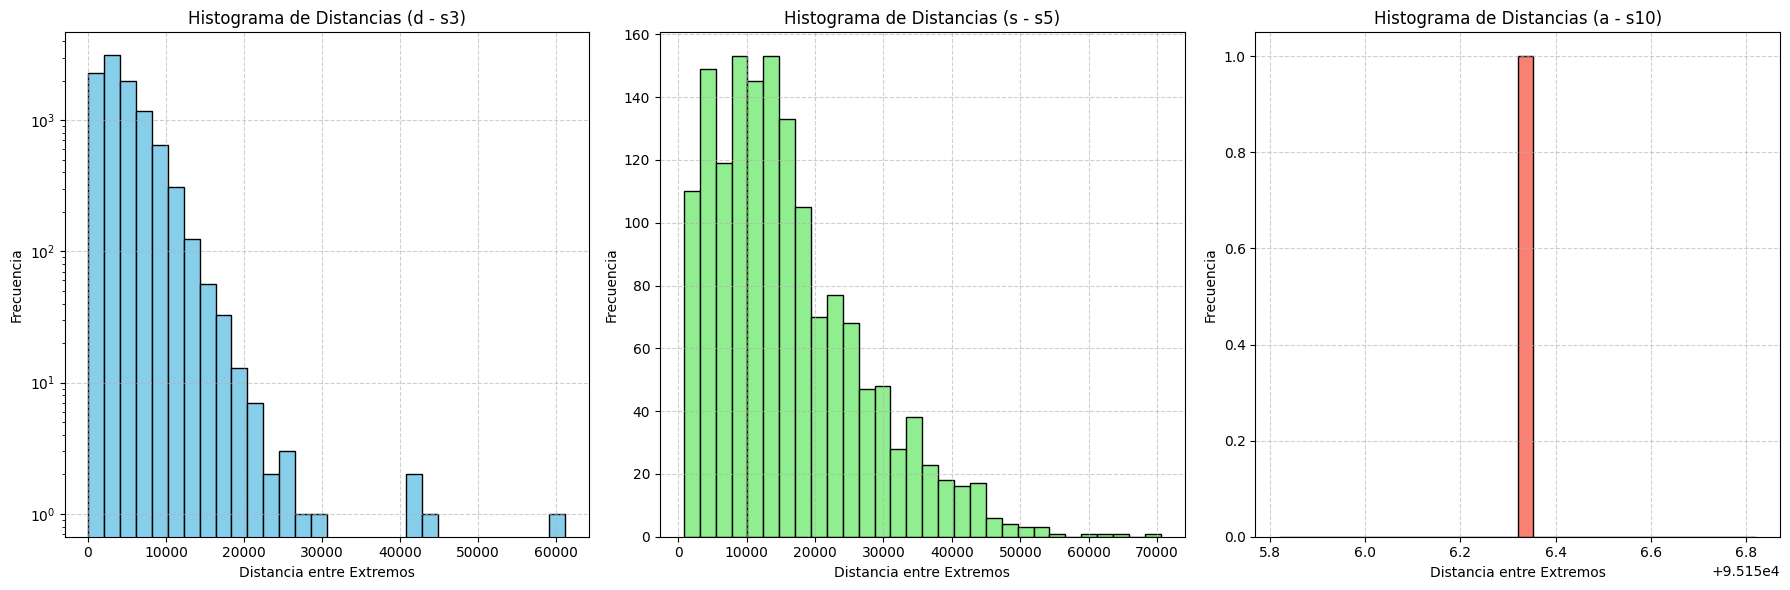

In [16]:


import matplotlib.pyplot as plt
# Histograma de las distancias
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(distances_d, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Distancias (d - s3)')
axes[0].set_xlabel('Distancia entre Extremos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(distances_s, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histograma de Distancias (s - s5)')
axes[1].set_xlabel('Distancia entre Extremos')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(distances_a, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Histograma de Distancias (a - s10)')
axes[2].set_xlabel('Distancia entre Extremos')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt
import numpy as np
def calculate_total_filament_length(dataset):
  filament_lengths = []
  sampling_points = dataset["FILAMENTS"]["SamplingPoints"]
  filaments_info = dataset["FILAMENTS"]["Finfo"]

  current_point_index = 0
  for index, row in filaments_info.iterrows():
    num_points = row["nSamp"]
    if num_points > 1: # Solo calculamos longitud si hay al menos 2 puntos
      filament_points = sampling_points[current_point_index : current_point_index + num_points]
      # Calcular las diferencias entre puntos consecutivos
      diffs = np.diff(filament_points, axis=0)
      # Calcular la norma (distancia euclidiana) de estas diferencias y sumarlas
      length = np.sum(np.linalg.norm(diffs, axis=1))
      filament_lengths.append(length)
    else:
      # Filamentos con un solo punto tienen longitud 0
      filament_lengths.append(0)

    # Mover el índice al inicio del siguiente filamento
    current_point_index += num_points

  return filament_lengths

# Calcular y imprimir las longitudes totales para cada dataset
lengths_d = calculate_total_filament_length(d)
lengths_s = calculate_total_filament_length(s)
lengths_a = calculate_total_filament_length(a)

print("Longitud total de cada filamento para el dataset d (s3):")
for i, length in enumerate(lengths_d):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)

print("Longitud total de cada filamento para el dataset s (s5):")
for i, length in enumerate(lengths_s):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)

print("Longitud total de cada filamento para el dataset a (s10):")
for i, length in enumerate(lengths_a):
  print(f"  Filamento {i}: {length:.4f}")
print("-" * 20)


Longitud total de cada filamento para el dataset d (s3):
  Filamento 0: 6773.6709
  Filamento 1: 4188.6509
  Filamento 2: 8850.3975
  Filamento 3: 13623.1963
  Filamento 4: 3328.0361
  Filamento 5: 3682.2974
  Filamento 6: 3946.4077
  Filamento 7: 1724.2891
  Filamento 8: 7601.5591
  Filamento 9: 10697.8145
  Filamento 10: 4516.3755
  Filamento 11: 1199.1395
  Filamento 12: 3562.1333
  Filamento 13: 4575.4297
  Filamento 14: 16870.4590
  Filamento 15: 7461.0098
  Filamento 16: 2054.0303
  Filamento 17: 980.1035
  Filamento 18: 1695.4326
  Filamento 19: 1207.1848
  Filamento 20: 5370.9131
  Filamento 21: 2001.7963
  Filamento 22: 4069.3037
  Filamento 23: 1660.0018
  Filamento 24: 5152.1343
  Filamento 25: 1003.5696
  Filamento 26: 15782.8701
  Filamento 27: 16890.8457
  Filamento 28: 4364.1421
  Filamento 29: 2749.9753
  Filamento 30: 3800.4014
  Filamento 31: 6240.2983
  Filamento 32: 10123.0361
  Filamento 33: 13431.5625
  Filamento 34: 5200.9502
  Filamento 35: 6690.6836
  Filamento

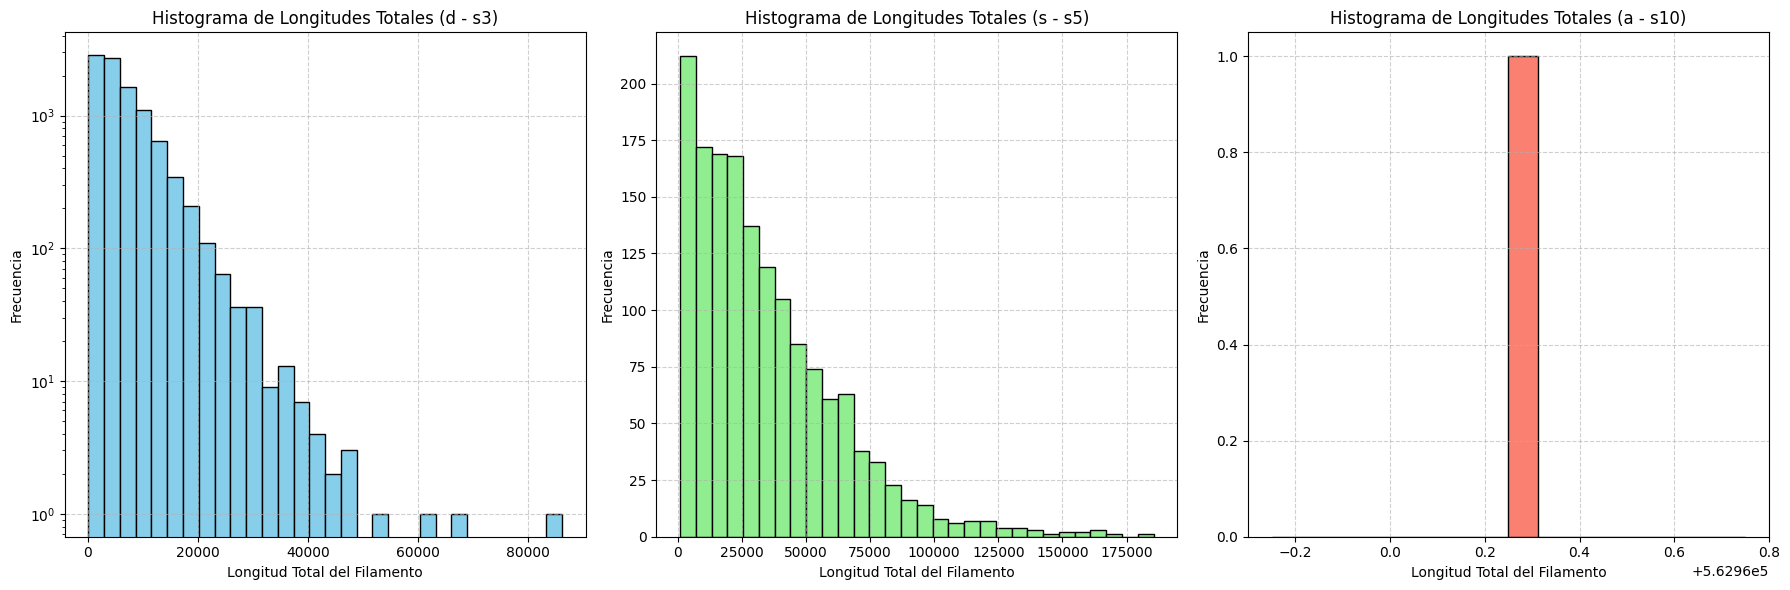

In [18]:
# Histograma de las longitudes totales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(lengths_d, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Longitudes Totales (d - s3)')
axes[0].set_xlabel('Longitud Total del Filamento')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(lengths_s, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histograma de Longitudes Totales (s - s5)')
axes[1].set_xlabel('Longitud Total del Filamento')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(lengths_a, bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Histograma de Longitudes Totales (a - s10)')
axes[2].set_xlabel('Longitud Total del Filamento')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# Función para calcular la curvatura
def calculate_curvature(total_length, end_to_end_distance):
  # Evitar división por cero o distancias muy pequeñas que puedan dar curvaturas infinitas
  if end_to_end_distance == 0:
    return 0 # O podrías retornar NaN o algún otro valor que indique indefinido
  return total_length / end_to_end_distance

# Calcular la curvatura para cada filamento en cada dataset
curvatures_d = [calculate_curvature(lengths_d[i], distances_d[i]) for i in range(len(lengths_d))]
curvatures_s = [calculate_curvature(lengths_s[i], distances_s[i]) for i in range(len(lengths_s))]
curvatures_a = [calculate_curvature(lengths_a[i], distances_a[i]) for i in range(len(lengths_a))]

print("Curvatura de cada filamento para el dataset d (s3):")
for i, curvature in enumerate(curvatures_d):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)

print("Curvatura de cada filamento para el dataset s (s5):")
for i, curvature in enumerate(curvatures_s):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)

print("Curvatura de cada filamento para el dataset a (s10):")
for i, curvature in enumerate(curvatures_a):
  print(f"  Filamento {i}: {curvature:.4f}")
print("-" * 20)


Curvatura de cada filamento para el dataset d (s3):
  Filamento 0: 1.9413
  Filamento 1: 1.1265
  Filamento 2: 2.0661
  Filamento 3: 1.1395
  Filamento 4: 1.0634
  Filamento 5: 1.5608
  Filamento 6: 1.2673
  Filamento 7: 1.0252
  Filamento 8: 1.4569
  Filamento 9: 1.1286
  Filamento 10: 1.6075
  Filamento 11: 1.0125
  Filamento 12: 1.0645
  Filamento 13: 1.2988
  Filamento 14: 1.6739
  Filamento 15: 1.0460
  Filamento 16: 1.2413
  Filamento 17: 1.0177
  Filamento 18: 1.0160
  Filamento 19: 1.0029
  Filamento 20: 1.7378
  Filamento 21: 1.0221
  Filamento 22: 1.3442
  Filamento 23: 1.0213
  Filamento 24: 1.2012
  Filamento 25: 1.0116
  Filamento 26: 1.6740
  Filamento 27: 1.6503
  Filamento 28: 1.3855
  Filamento 29: 1.1663
  Filamento 30: 1.0173
  Filamento 31: 1.4524
  Filamento 32: 1.5148
  Filamento 33: 1.3547
  Filamento 34: 1.1202
  Filamento 35: 1.4410
  Filamento 36: 1.2982
  Filamento 37: 1.1154
  Filamento 38: 1.4281
  Filamento 39: 1.0133
  Filamento 40: 1.6061
  Filamento 41:

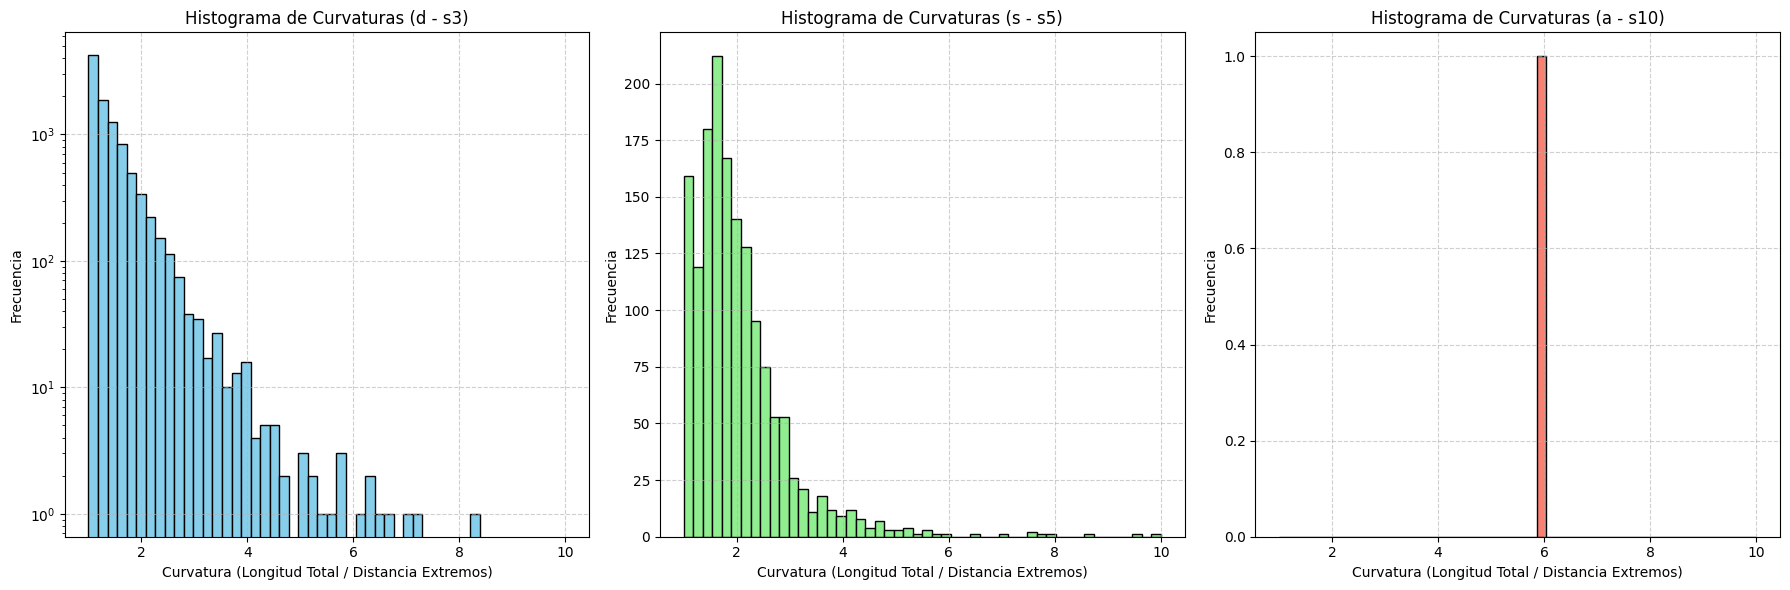

In [20]:
# Histograma de las curvaturas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para dataset d
axes[0].hist(curvatures_d, bins=50, color='skyblue', edgecolor='black', range=(1, 10)) # Ajusta el rango de los bins si es necesario
axes[0].set_title('Histograma de Curvaturas (d - s3)')
axes[0].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_yscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Histograma para dataset s
axes[1].hist(curvatures_s, bins=50, color='lightgreen', edgecolor='black', range=(1, 10))
axes[1].set_title('Histograma de Curvaturas (s - s5)')
axes[1].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.6)


# Histograma para dataset a
axes[2].hist(curvatures_a, bins=50, color='salmon', edgecolor='black', range=(1, 10))
axes[2].set_title('Histograma de Curvaturas (a - s10)')
axes[2].set_xlabel('Curvatura (Longitud Total / Distancia Extremos)')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

In [21]:
print("Estadísticas descriptivas de la curvatura:")
print("Dataset d (s3):")
print(f"  Media: {np.mean(curvatures_d):.4f}")
print(f"  Mediana: {np.median(curvatures_d):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_d):.4f}")
print("-" * 20)

print("Dataset s (s5):")
print(f"  Media: {np.mean(curvatures_s):.4f}")
print(f"  Mediana: {np.median(curvatures_s):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_s):.4f}")
print("-" * 20)

print("Dataset a (s10):")
print(f"  Media: {np.mean(curvatures_a):.4f}")
print(f"  Mediana: {np.median(curvatures_a):.4f}")
print(f"  Desviación estándar: {np.std(curvatures_a):.4f}")
print("-" * 20)

Estadísticas descriptivas de la curvatura:
Dataset d (s3):
  Media: 1.3954
  Mediana: 1.2300
  Desviación estándar: 0.4976
--------------------
Dataset s (s5):
  Media: 2.0655
  Mediana: 1.8218
  Desviación estándar: 1.0897
--------------------
Dataset a (s10):
  Media: 5.9162
  Mediana: 5.9162
  Desviación estándar: 0.0000
--------------------


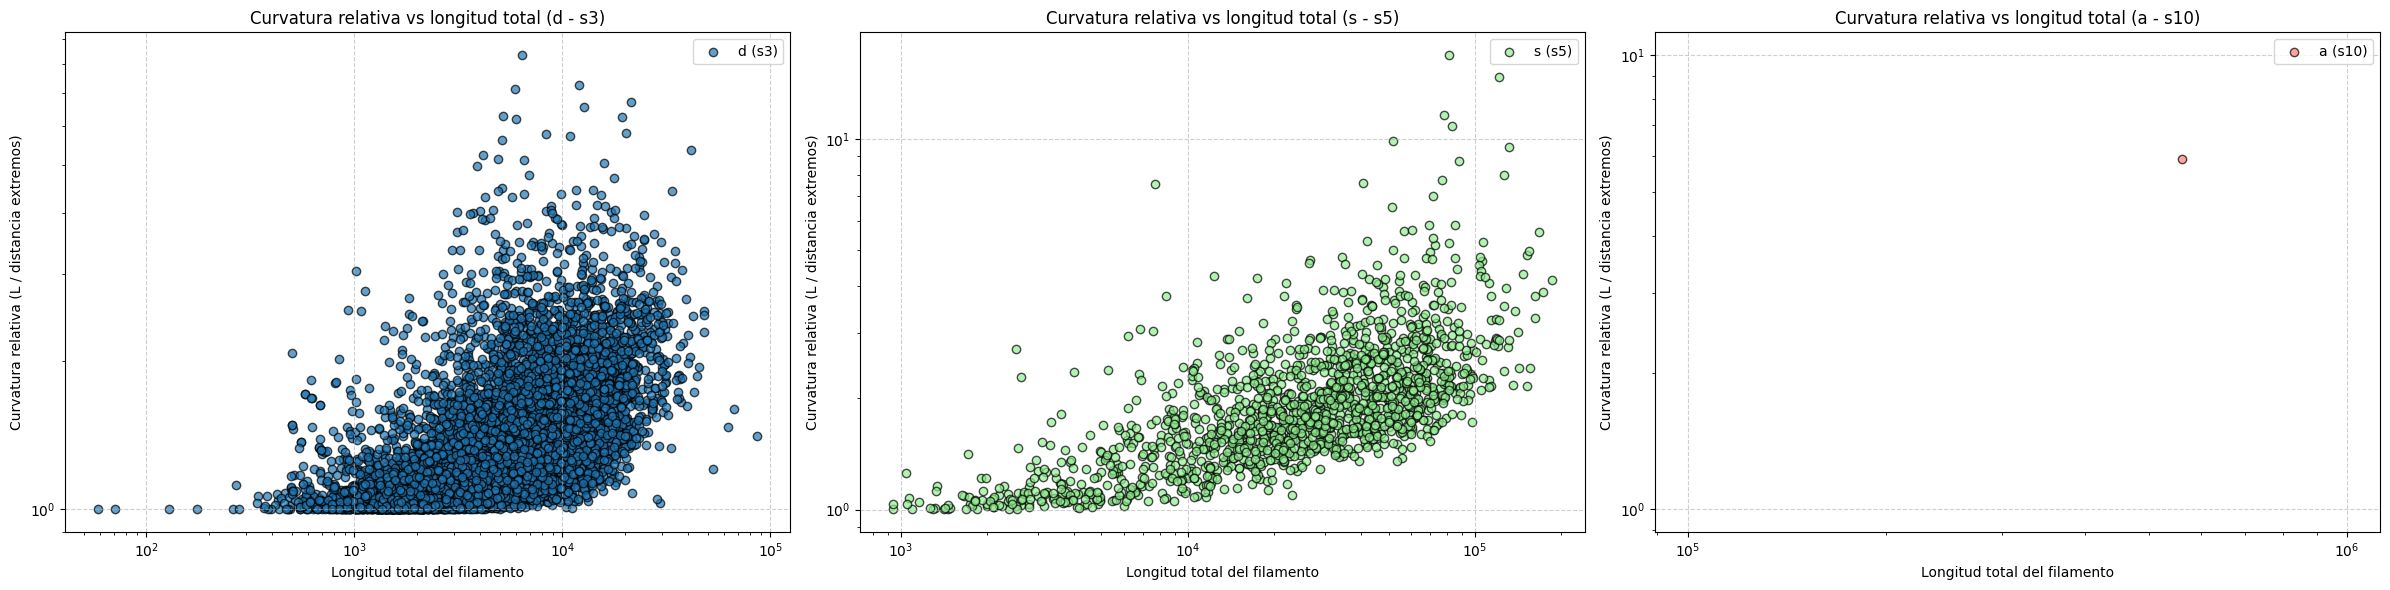

In [22]:

import matplotlib.pyplot as plt
# Scatter plots de Curvatura vs Longitud para los 3 datasets
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Scatter plot para dataset d
axes[0].scatter(lengths_d, curvatures_d, alpha=0.7, edgecolors='k', label='d (s3)')
axes[0].set_xlabel('Longitud total del filamento')
axes[0].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[0].set_title('Curvatura relativa vs longitud total (d - s3)')
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Scatter plot para dataset s
axes[1].scatter(lengths_s, curvatures_s, alpha=0.7, edgecolors='k', color='lightgreen', label='s (s5)')
axes[1].set_xlabel('Longitud total del filamento')
axes[1].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[1].set_title('Curvatura relativa vs longitud total (s - s5)')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Scatter plot para dataset a
axes[2].scatter(lengths_a, curvatures_a, alpha=0.7, edgecolors='k', color='salmon', label='a (s10)')
axes[2].set_xlabel('Longitud total del filamento')
axes[2].set_ylabel('Curvatura relativa (L / distancia extremos)')
axes[2].set_title('Curvatura relativa vs longitud total (a - s10)')
axes[2].set_yscale('log')
axes[2].set_xscale('log')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

plt.tight_layout()
plt.show()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  Filamento 6319: [0.53130627 0.01190299 0.8470962 ]
  Filamento 6320: [ 0.90250015 -0.43026882 -0.01903663]
  Filamento 6321: [-0.90791655 -0.36180702 -0.21162058]
  Filamento 6322: [ 0.4189586 -0.8796427 -0.225172 ]
  Filamento 6323: [0.4730063  0.83819026 0.27148122]
  Filamento 6324: [-0.9799187   0.18552302  0.0730793 ]
  Filamento 6325: [ 0.18262936 -0.7039178  -0.68640095]
  Filamento 6326: [0.38158458 0.83429575 0.39792448]
  Filamento 6327: [0.38158458 0.83429575 0.39792448]
  Filamento 6328: [ 0.6448112  -0.22978504 -0.7289838 ]
  Filamento 6329: [-0.93651587 -0.27348173  0.21942137]
  Filamento 6330: [0.36337605 0.9312809  0.02595543]
  Filamento 6331: [-0.798721  -0.5127413 -0.3148665]
  Filamento 6332: [-0.02834089 -0.7973749   0.6028185 ]
  Filamento 6333: [-0.02834089 -0.7973749   0.6028185 ]
  Filamento 6334: [-0.18054228 -0.16628522 -0.969409  ]
  Filamento 6335: [-0.26644394  0.06537569  0.96163076]
  

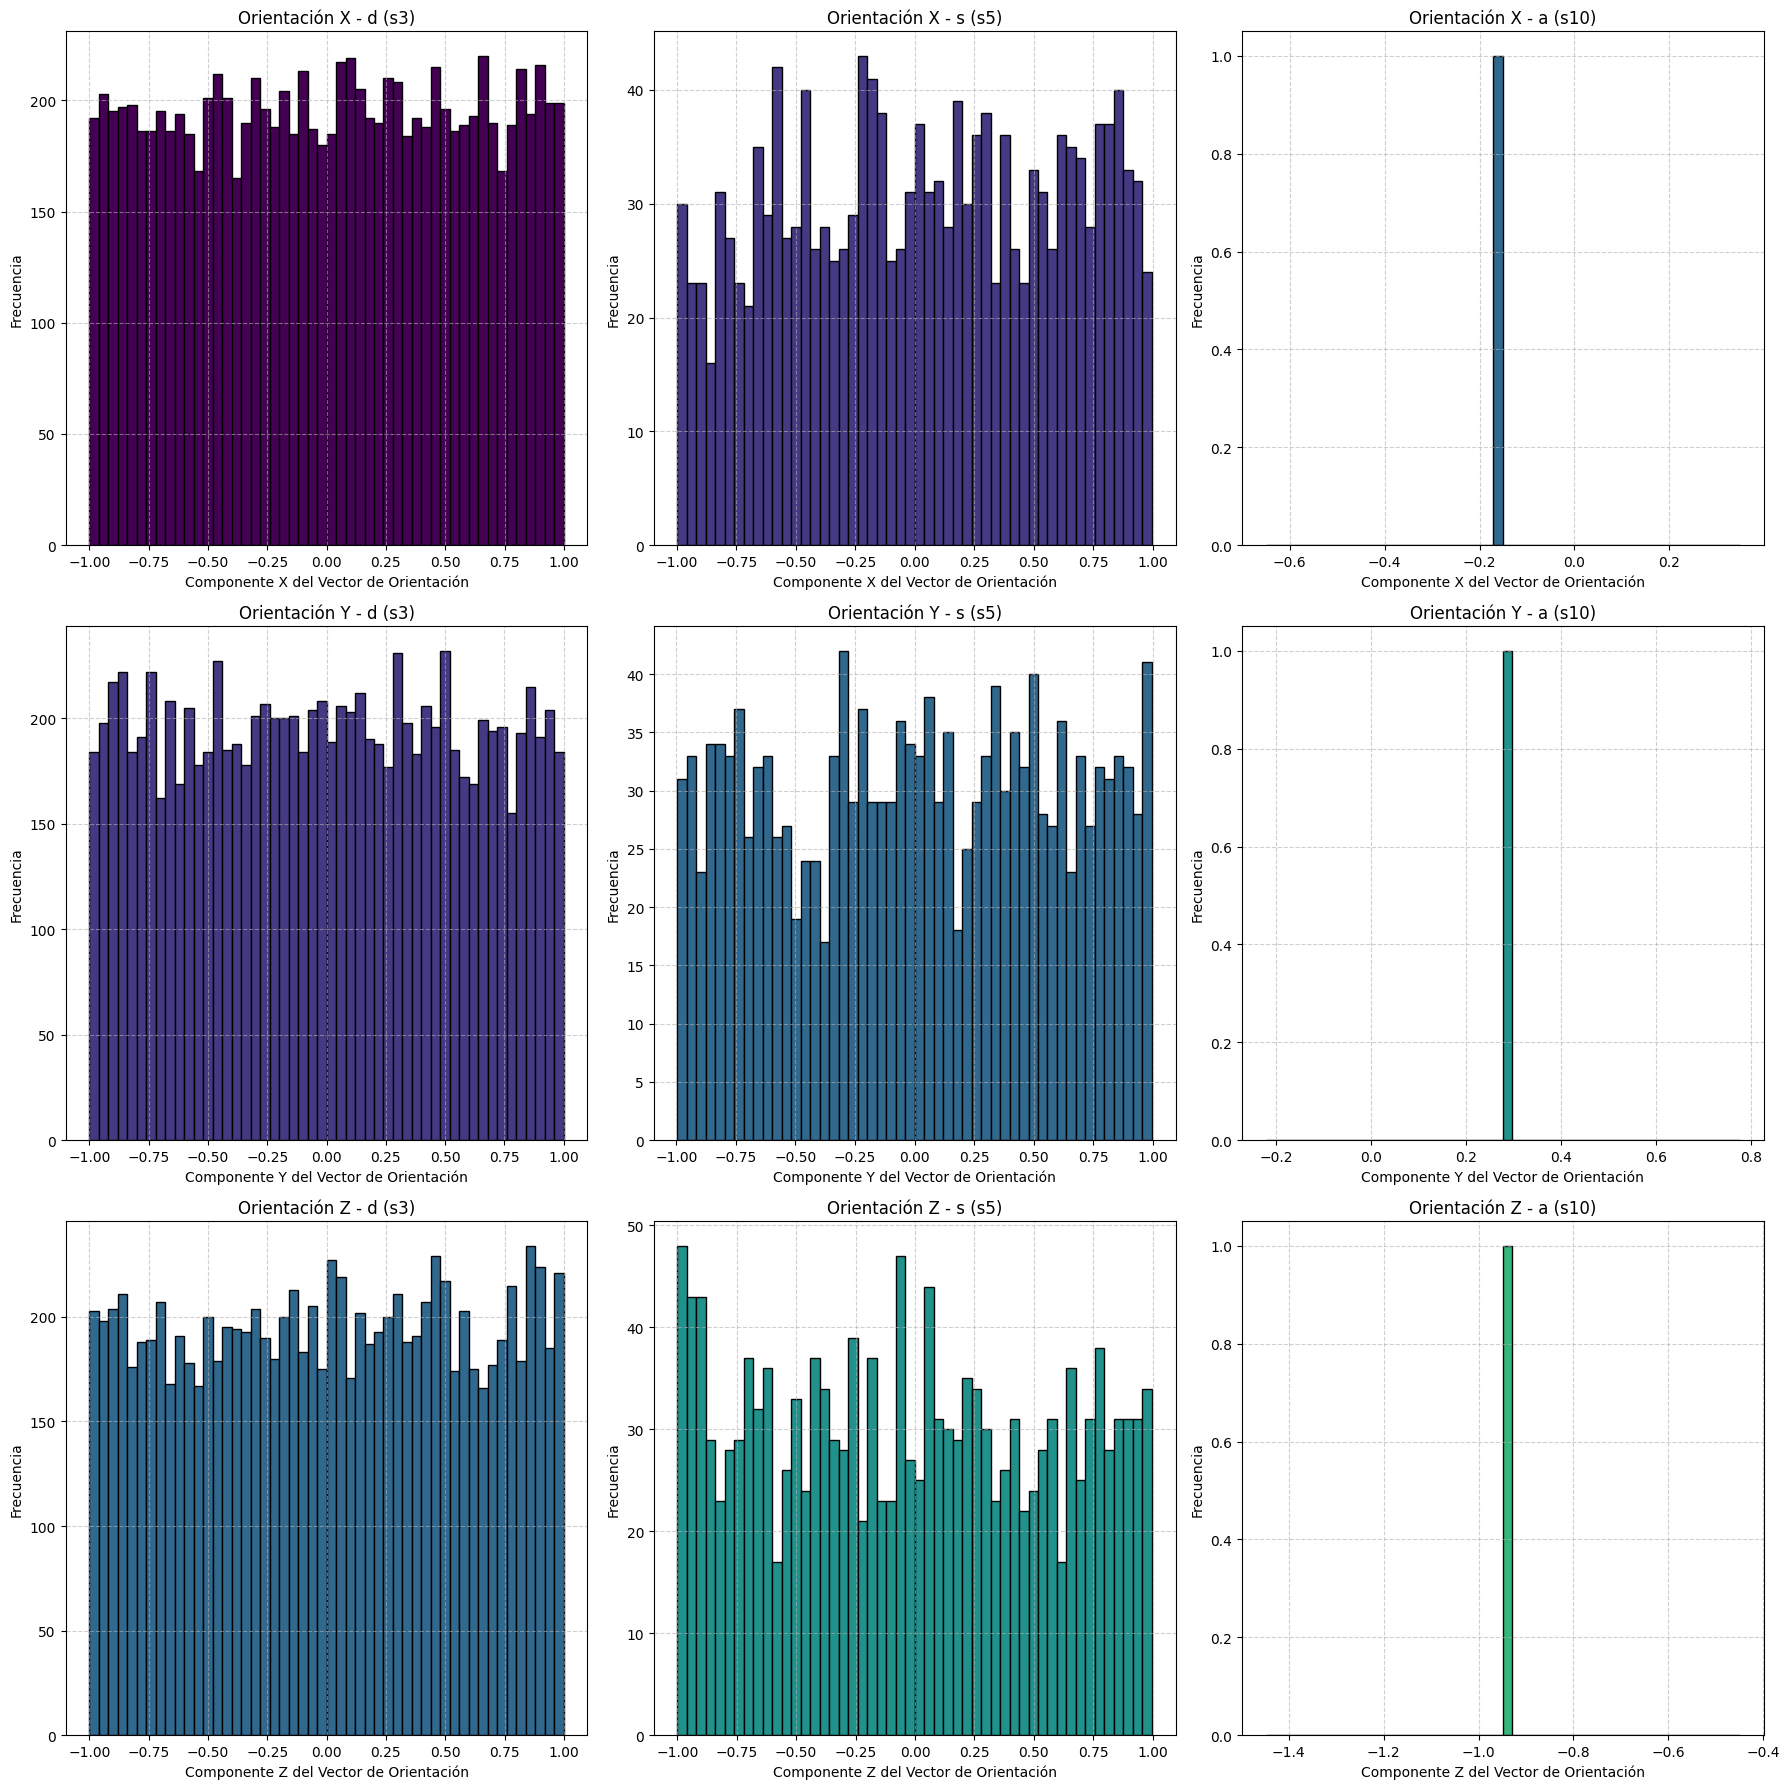

Demasiados filamentos en el dataset d para graficar los vectores de orientación.
Demasiados filamentos en el dataset s para graficar los vectores de orientación.


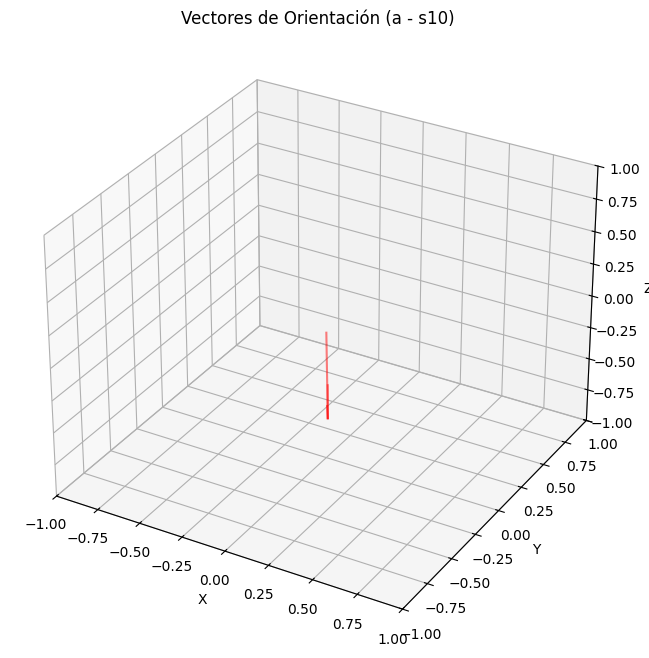

In [23]:
import matplotlib.pyplot as plt
import numpy as np
def calculate_filament_orientation(dataset):
  """
  Calcula la orientación principal de cada filamento utilizando el vector
  que conecta sus puntos extremos.

  Argumentos:
    dataset (dict): Diccionario que contiene la información de los filamentos,
                    incluyendo "SamplingPoints" y "Finfo".

  Retorna:
    list: Una lista de arrays numpy, donde cada array representa el vector de
          orientación normalizado para cada filamento.
  """
  orientations = []
  sampling_points = dataset["FILAMENTS"]["SamplingPoints"]
  filaments_info = dataset["FILAMENTS"]["Finfo"]

  current_point_index = 0
  for index, row in filaments_info.iterrows():
    num_points = row["nSamp"]
    if num_points > 1:
      # Los puntos extremos son el primero y el último punto del filamento
      start_point = sampling_points[current_point_index]
      end_point = sampling_points[current_point_index + num_points - 1]

      # Calcular el vector que conecta los puntos extremos
      orientation_vector = end_point - start_point

      # Normalizar el vector para obtener solo la dirección
      norm = np.linalg.norm(orientation_vector)
      if norm > 0:
        normalized_orientation = orientation_vector / norm
        orientations.append(normalized_orientation)
      else:
        # Para filamentos con puntos coincidentes, la orientación no está definida.
        # Podríamos representar esto con un vector de ceros o NaN.
        orientations.append(np.array([0.0, 0.0, 0.0]))
    else:
      # Filamentos con un solo punto no tienen orientación definida
      orientations.append(np.array([0.0, 0.0, 0.0]))

    # Mover el índice al inicio del siguiente filamento
    current_point_index += num_points

  return orientations

# Calcular las orientaciones para cada dataset
orientations_d = calculate_filament_orientation(d)
orientations_s = calculate_filament_orientation(s)
orientations_a = calculate_filament_orientation(a)

print("Vectores de orientación (normalizados) para el dataset d (s3):")
for i, orientation in enumerate(orientations_d):
  print(f"  Filamento {i}: {orientation}")
print("-" * 20)

print("Vectores de orientación (normalizados) para el dataset s (s5):")
for i, orientation in enumerate(orientations_s):
  print(f"  Filamento {i}: {orientation}")
print("-" * 20)

print("Vectores de orientación (normalizados) para el dataset a (s10):")
for i, orientation in enumerate(orientations_a):
  print(f"  Filamento {i}: {orientation}")
print("-" * 20)

# Para visualizar la distribución de orientaciones, puedes usar histogramas
# de los componentes X, Y, Z de los vectores de orientación, o proyecciones
# en la esfera unitaria.

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
datasets_orientations = [orientations_d, orientations_s, orientations_a]
dataset_names = ['d (s3)', 's (s5)', 'a (s10)']
components = ['X', 'Y', 'Z']

for i, orientations in enumerate(datasets_orientations):
    orientations_array = np.array(orientations)
    if orientations_array.shape[0] > 0: # Asegurarse de que hay datos para graficar
        for j in range(3):
            axes[j, i].hist(orientations_array[:, j], bins=50, color=plt.cm.viridis((i+j)/6), edgecolor='black')
            axes[j, i].set_title(f'Orientación {components[j]} - {dataset_names[i]}')
            axes[j, i].set_xlabel(f'Componente {components[j]} del Vector de Orientación')
            axes[j, i].set_ylabel('Frecuencia')
            axes[j, i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Otra forma de visualizar la orientación es en un gráfico 3D
# Solo graficaremos los vectores de orientación si hay una cantidad manejable de filamentos
def plot_orientation_vectors(orientations, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los vectores desde el origen
    origin = np.zeros((len(orientations), 3))
    orientations_array = np.array(orientations)

    # Filter out zero vectors before plotting
    non_zero_indices = np.linalg.norm(orientations_array, axis=1) > 0
    origin_filtered = origin[non_zero_indices]
    orientations_filtered = orientations_array[non_zero_indices]


    ax.quiver(origin_filtered[:,0], origin_filtered[:,1], origin_filtered[:,2],
              orientations_filtered[:,0], orientations_filtered[:,1], orientations_filtered[:,2],
              length=1.0, color='r', alpha=0.5)

    # Configurar los límites de los ejes para una esfera unitaria
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

# Graficar los vectores de orientación para cada dataset
if len(orientations_d) < 1000: # Evitar graficar demasiados vectores
    plot_orientation_vectors(orientations_d, 'Vectores de Orientación (d - s3)')
else:
    print("Demasiados filamentos en el dataset d para graficar los vectores de orientación.")

if len(orientations_s) < 1000:
    plot_orientation_vectors(orientations_s, 'Vectores de Orientación (s - s5)')
else:
    print("Demasiados filamentos en el dataset s para graficar los vectores de orientación.")

if len(orientations_a) < 1000:
    plot_orientation_vectors(orientations_a, 'Vectores de Orientación (a - s10)')
else:
    print("Demasiados filamentos en el dataset a para graficar los vectores de orientación.")



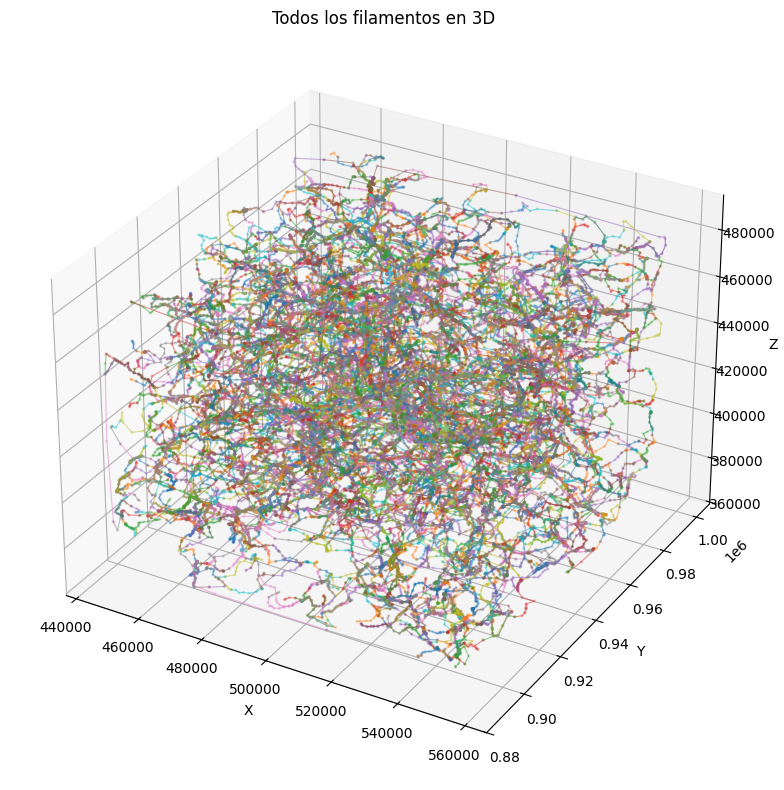

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Cargar los datos
if 'd' in globals() and 'FILAMENTS' in d and isinstance(d['FILAMENTS'], dict):
    filamentos_data = d['FILAMENTS']
    if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
        sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
        finfo = filamentos_data["Finfo"]                     # DataFrame con info de los filamentos

        # Creamos una figura 3D para graficar todos los filamentos
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Iterar a través de cada filamento usando la información en Finfo
        for index, row in finfo.iterrows():
            start = row["firstIndex"]
            size = row["nSamp"]

            # Extraer puntos del filamento actual
            # Asegurarse de que el inicio y el tamaño sean índices/tamaños válidos
            if start < 0 or size < 0 or start + size > len(sampling_points):
                print(f"Warning: Invalid indices for filament {index}. Skipping plotting.")
                continue

            filament_points = sampling_points[start : start + size]

            # Verificamos que tenga suficientes puntos para graficar
            if filament_points.shape[0] < 2:
                # print(f"Filamento {index} tiene muy pocos puntos para graficar.")
                continue # Saltar filamentos con menos de 2 puntos


            #  Graficaremos sin normalizar.
            x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]

            # Graficamos en matplotlib. Usamos un color y estilo genérico para todos
            ax.plot(x, y, z, linewidth=0.8, alpha=0.5) # Linea conectando puntos
            ax.scatter(x, y, z, alpha=0.2, s=2)     # Puntos individuales


        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("Todos los filamentos en 3D")

        plt.tight_layout()
        plt.savefig("todos_los_filamentos_3d.png")
        plt.show()
    else:
        print("Las claves 'SamplingPoints' o 'Finfo' no se encontraron en d['FILAMENTS'].")
else:
    print("La variable 'd' o la clave 'FILAMENTS' no están disponibles.")

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

# Función para animar filamentos 3D
def animar_filamentos_3d(dataset, nombre_dataset, output_gif=""):
    if 'FILAMENTS' in dataset and isinstance(dataset['FILAMENTS'], dict):
        filamentos_data = dataset['FILAMENTS']
        if 'SamplingPoints' in filamentos_data and 'Finfo' in filamentos_data:
            sampling_points = filamentos_data["SamplingPoints"]  # (N, 3)
            finfo = filamentos_data["Finfo"]                     # DataFrame

            # Crear figura y ejes 3D
            fig = plt.figure(figsize=(8, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Dibujar todos los filamentos una sola vez
            for index, row in finfo.iterrows():
                start = row["firstIndex"]
                size = row["nSamp"]

                if start < 0 or size < 0 or start + size > len(sampling_points):
                    continue

                filament_points = sampling_points[start : start + size]
                if filament_points.shape[0] < 2:
                    continue

                x, y, z = filament_points[:, 0], filament_points[:, 1], filament_points[:, 2]
                ax.plot(x, y, z, linewidth=0.6, alpha=0.5)
                ax.scatter(x, y, z, s=2, alpha=0.2)

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.set_title(f"Filamentos 3D - {nombre_dataset}")

            # Ajustar límites si deseas que la rotación sea más estable
            ax.set_box_aspect([1,1,1])

            # Función de actualización para la animación (rotación)
            def update(angle):
                ax.view_init(elev=30, azim=angle)
                return fig,

            ani = animation.FuncAnimation(
                fig, update,
                frames=np.arange(0, 360, 2),  # 180 frames por vuelta
                interval=50, blit=False
            )

            if output_gif == "":
                output_gif = f"filamentos_3d_{nombre_dataset}.gif"

            ani.save(output_gif, writer="pillow", fps=20)
            plt.close(fig)
            print(f"Animación guardada: {output_gif}")
        else:
            print(f"Faltan claves 'SamplingPoints' o 'Finfo' en {nombre_dataset}.")
    else:
        print(f"Estructura inválida en {nombre_dataset}.")

# Llamar la función para cada dataset
animar_filamentos_3d(d, "s3")
animar_filamentos_3d(s, "s5")
animar_filamentos_3d(a, "s10")


Animación guardada: filamentos_3d_s3.gif
Animación guardada: filamentos_3d_s5.gif
Animación guardada: filamentos_3d_s10.gif


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

# --- Preparar datos ---
filamentos_data = d['FILAMENTS']
sampling_points = filamentos_data["SamplingPoints"]
finfo = filamentos_data["Finfo"]

# --- Extraer todos los segmentos como lista de listas de puntos ---
filamentos = []
for index, row in finfo.iterrows():
    start = row["firstIndex"]
    size = row["nSamp"]
    if start < 0 or size < 2 or start + size > len(sampling_points):
        continue
    puntos = sampling_points[start : start + size]
    filamentos.append(puntos)

# --- Parámetros de animación ---
modo = "punto"  # Cambia a "filamento" si quieres que aparezcan filamentos enteros
pasos_por_filamento = 20  # Número de pasos para "construir" cada filamento (solo si modo == "punto")

# --- Crear figura 3D ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Construcción progresiva de filamentos 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1, 1, 1])  # Aspecto igual en todos los ejes

# --- Inicializar elementos para animación ---
lineas = []
for _ in filamentos:
    line, = ax.plot([], [], [], linewidth=1, alpha=0.6)
    lineas.append(line)

# --- Crear todos los frames ---
frames = []
if modo == "filamento":
    # Cada frame muestra un filamento más
    total_frames = len(filamentos)
    def update(frame):
        for i in range(frame + 1):
            x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
            lineas[i].set_data(x, y)
            lineas[i].set_3d_properties(z)
        return lineas
else:
    # Cada filamento se construye paso a paso
    total_frames = len(filamentos) * pasos_por_filamento
    def update(frame):
        f_idx = frame // pasos_por_filamento
        paso = frame % pasos_por_filamento
        for i in range(f_idx):
            x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
            lineas[i].set_data(x, y)
            lineas[i].set_3d_properties(z)
        if f_idx < len(filamentos):
            puntos = filamentos[f_idx]
            max_idx = max(2, int(len(puntos) * (paso + 1) / pasos_por_filamento))
            p = puntos[:max_idx]
            x, y, z = p[:, 0], p[:, 1], p[:, 2]
            lineas[f_idx].set_data(x, y)
            lineas[f_idx].set_3d_properties(z)
        return lineas

# --- Crear y guardar animación ---
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=80, blit=False)
ani.save("construccion_filamentos.gif", writer='pillow', fps=15)
plt.close()
print("GIF guardado: construccion_filamentos.gif")


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

# --- Preparar datos ---
filamentos_data = d['FILAMENTS']
sampling_points = filamentos_data["SamplingPoints"]
finfo = filamentos_data["Finfo"]

# --- Extraer todos los segmentos como lista de listas de puntos ---
filamentos = []
for index, row in finfo.iterrows():
    start = row["firstIndex"]
    size = row["nSamp"]
    if start < 0 or size < 2 or start + size > len(sampling_points):
        continue
    puntos = sampling_points[start : start + size]
    filamentos.append(puntos)

# --- Parámetros ---
modo = "punto"  # "filamento" o "punto"
pasos_por_filamento = 15
frames_rotacion = 60  # número de frames de rotación final
intervalo_ms = 80

# --- Preparar figura ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Construcción y rotación de filamentos 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1, 1, 1])

# Inicializar líneas vacías
lineas = []
for _ in filamentos:
    line, = ax.plot([], [], [], linewidth=1.2, alpha=0.6)
    lineas.append(line)

# Total de frames
if modo == "filamento":
    total_construccion_frames = len(filamentos)
else:
    total_construccion_frames = len(filamentos) * pasos_por_filamento
total_frames = total_construccion_frames + frames_rotacion

# Función de actualización
def update(frame):
    if frame < total_construccion_frames:
        # Fase de construcción
        if modo == "filamento":
            for i in range(frame + 1):
                x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
                lineas[i].set_data(x, y)
                lineas[i].set_3d_properties(z)
        else:
            f_idx = frame // pasos_por_filamento
            paso = frame % pasos_por_filamento
            for i in range(f_idx):
                x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
                lineas[i].set_data(x, y)
                lineas[i].set_3d_properties(z)
            if f_idx < len(filamentos):
                puntos = filamentos[f_idx]
                max_idx = max(2, int(len(puntos) * (paso + 1) / pasos_por_filamento))
                p = puntos[:max_idx]
                x, y, z = p[:, 0], p[:, 1], p[:, 2]
                lineas[f_idx].set_data(x, y)
                lineas[f_idx].set_3d_properties(z)
    else:
        # Fase de rotación
        angulo = 360 * (frame - total_construccion_frames) / frames_rotacion
        ax.view_init(elev=30, azim=angulo)

    return lineas

# Crear animación
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=intervalo_ms, blit=False)

# Guardar como GIF
ani.save("construccion_y_rotacion_filamentos.gif", writer="pillow", fps=int(1000/intervalo_ms))
plt.close()
print("GIF guardado como 'construccion_y_rotacion_filamentos.gif'")


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

# --- Preparar datos ---
filamentos_data = d['FILAMENTS']
sampling_points = filamentos_data["SamplingPoints"]
finfo = filamentos_data["Finfo"]

# --- Extraer todos los segmentos como lista de listas de puntos ---
filamentos = []
for index, row in finfo.iterrows():
    start = row["firstIndex"]
    size = row["nSamp"]
    if start < 0 or size < 2 or start + size > len(sampling_points):
        continue
    puntos = sampling_points[start : start + size]
    filamentos.append(puntos)

# --- Parámetros de animación ---
modo = "punto"  # Cambia a "filamento" si quieres que aparezcan filamentos enteros
pasos_por_filamento = 20  # Número de pasos para "construir" cada filamento (solo si modo == "punto")

# --- Crear figura 3D ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Construcción progresiva de filamentos 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1, 1, 1])  # Aspecto igual en todos los ejes

# --- Inicializar elementos para animación ---
lineas = []
for _ in filamentos:
    line, = ax.plot([], [], [], linewidth=1, alpha=0.6)
    lineas.append(line)

# --- Crear todos los frames ---
frames = []
if modo == "filamento":
    # Cada frame muestra un filamento más
    total_frames = len(filamentos)
    def update(frame):
        for i in range(frame + 1):
            x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
            lineas[i].set_data(x, y)
            lineas[i].set_3d_properties(z)
        return lineas
else:
    # Cada filamento se construye paso a paso
    total_frames = len(filamentos) * pasos_por_filamento
    def update(frame):
        f_idx = frame // pasos_por_filamento
        paso = frame % pasos_por_filamento
        for i in range(f_idx):
            x, y, z = filamentos[i][:, 0], filamentos[i][:, 1], filamentos[i][:, 2]
            lineas[i].set_data(x, y)
            lineas[i].set_3d_properties(z)
        if f_idx < len(filamentos):
            puntos = filamentos[f_idx]
            max_idx = max(2, int(len(puntos) * (paso + 1) / pasos_por_filamento))
            p = puntos[:max_idx]
            x, y, z = p[:, 0], p[:, 1], p[:, 2]
            lineas[f_idx].set_data(x, y)
            lineas[f_idx].set_3d_properties(z)
        return lineas

# --- Crear y guardar animación ---
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=80, blit=False)
ani.save("construccion_filamentos.gif", writer='pillow', fps=15)
plt.close()
print("GIF guardado: construccion_filamentos.gif")


NameError: name 'd' is not defined

In [ ]:

if 's' in globals() and 'FILAMENTS' in s and isinstance(s['FILAMENTS'], dict):
    if 'SamplingPoints' in s['FILAMENTS'] and 'Finfo' in s['FILAMENTS']:
        finfo_s = s['FILAMENTS']['Finfo'].copy()

        # Calcular las distancias entre extremos y longitudes totales para 's'
        distances_s = calculate_filament_distances(s)
        lengths_s = calculate_total_filament_length(s)
        curvatures_s = [calculate_curvature(lengths_s[i], distances_s[i]) for i in range(len(lengths_s))]
        orientations_s = calculate_filament_orientation(s)

        # Asegurarse de que las listas tienen la misma longitud que el DataFrame finfo_s
        if len(distances_s) == len(finfo_s) and \
           len(lengths_s) == len(finfo_s) and \
           len(curvatures_s) == len(finfo_s) and \
           len(orientations_s) == len(finfo_s):

            # Agregar las nuevas columnas al DataFrame finfo_s
            finfo_s['EndToEndDistance'] = distances_s
            finfo_s['TotalLength'] = lengths_s
            finfo_s['Curvature'] = curvatures_s
            finfo_s['Orientation_X'] = [o[0] for o in orientations_s]
            finfo_s['Orientation_Y'] = [o[1] for o in orientations_s]
            finfo_s['Orientation_Z'] = [o[2] for o in orientations_s]

            # Mostrar las primeras filas del DataFrame resultante para 's'
            print("\nDataFrame con información de los filamentos para el dataset s:")
            print(finfo_s.head())
        else:
            print("Error: Las longitudes de las listas calculadas no coinciden con el número de filamentos en el dataset s.")

    else:
        print("Las claves 'SamplingPoints' o 'Finfo' no se encontraron en s['FILAMENTS'].")
else:
    print("La variable 's' no está definida o no contiene la estructura esperada para 'FILAMENTS'.")

In [ ]:
# prompt: esto pero  para 3D : import numpy as np
# import matplotlib.pyplot as plt
# # --- Función: tensor de inercia en 2D
# def tensor_inercia_2D(puntos):
#     """
#     Calcula el tensor de inercia 2D respecto al centro de masa.
#     """
#     puntos = puntos - puntos.mean(axis=0)
#     x, y = puntos[:, 0], puntos[:, 1]
#     Ixx = np.sum(y**2)
#     Iyy = np.sum(x**2)
#     Ixy = -np.sum(x * y)
#     I = np.array([
#         [Ixx, Ixy],
#         [Ixy, Iyy]
#     ])
#     return I
# # --- Inicializar diccionarios
# longitudes_principales = {}
# grosores_transversales = {}
# orientaciones = {}
# # --- Cálculo para cada dataset
# for nombre_dataset, data in datasets.items():
#     sampling_points = data['FILAMENTS']['SamplingPoints']
#     finfo = data['FILAMENTS']['Finfo']
#     longitudes = []
#     grosores = []
#     angulos = []
#     for idx, row in finfo.iterrows():
#         start = row["firstIndex"]
#         npoints = row["nSamp"]
#         puntos = sampling_points[start : start + npoints]
#         # Verificamos que haya al menos dos puntos
#         if puntos.shape[0] < 2:
#             continue
#         # Calcular tensor y obtener autovalores y autovectores
#         I = tensor_inercia_2D(puntos)
#         vals, vecs = np.linalg.eigh(I)  # ordenados de menor a mayor
#         # Ordenar valores propios
#         grosor = np.sqrt(vals[0])  # menor → grosor
#         longitud = np.sqrt(vals[1])  # mayor → longitud principal
#         # Orientación del eje principal (vector asociado a valor mayor)
#         vec_principal = vecs[:, 1]
#         angulo = np.arctan2(vec_principal[1], vec_principal[0])  # en radianes
#         longitudes.append(longitud)
#         grosores.append(grosor)
#         angulos.append(angulo)
#     longitudes_principales[nombre_dataset] = np.array(longitudes)
#     grosores_transversales[nombre_dataset] = np.array(grosores)
#     orientaciones[nombre_dataset] = np.array(angulos)
# print("¡Cálculo de inercia y propiedades completado!")

import numpy as np
# --- Función: tensor de inercia en 3D
def tensor_inercia_3D(puntos):
  """
  Calcula el tensor de inercia 3D respecto al centro de masa.
  """
  # Centrar los puntos
  puntos_centrados = puntos - puntos.mean(axis=0)
  x, y, z = puntos_centrados[:, 0], puntos_centrados[:, 1], puntos_centrados[:, 2]
  # Calcular elementos del tensor de inercia
  Ixx = np.sum(y**2 + z**2)
  Iyy = np.sum(x**2 + z**2)
  Izz = np.sum(x**2 + y**2)
  Ixy = -np.sum(x * y)
  Ixz = -np.sum(x * z)
  Iyz = -np.sum(y * z)
  # Construir el tensor de inercia simétrico
  I = np.array([
      [Ixx, Ixy, Ixz],
      [Ixy, Iyy, Iyz],
      [Ixz, Iyz, Izz]
  ])
  return I
# --- Inicializar diccionarios para 3D
longitudes_principales_3D = {}
grosores_transversales_3D = {}
orientaciones_3D = {}
# --- Cálculo para el dataset 3D
datasets_3D = {'sussing_125.z0.000_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl': d} # Usamos el diccionario 'd' cargado previamente
for nombre_dataset, data in datasets_3D.items():
  sampling_points = data['FILAMENTS']['SamplingPoints']
  finfo = data['FILAMENTS']['Finfo']
  longitudes = []
  grosores_1 = [] # Para el segundo autovalor
  grosores_2 = [] # Para el primer autovalor
  orientaciones_vec = [] # Para almacenar los vectores principales
  for idx, row in finfo.iterrows():
    start = row["firstIndex"]
    npoints = row["nSamp"]
    puntos = sampling_points[start : start + npoints]
    # Verificamos que haya al menos dos puntos
    if puntos.shape[0] < 2:
      continue
    # Calcular tensor de inercia 3D y obtener autovalores y autovectores
    I = tensor_inercia_3D(puntos)
    vals, vecs = np.linalg.eigh(I) # ordenados de menor a mayor
    # Ordenar valores propios: vals[0] < vals[1] < vals[2]
    grosor_1 = np.sqrt(vals[0]) # menor → primer grosor transversal
    grosor_2 = np.sqrt(vals[1]) # segundo menor → segundo grosor transversal
    longitud = np.sqrt(vals[2]) # mayor → longitud principal
    # Orientación del eje principal (vector asociado a valor mayor)
    vec_principal = vecs[:, 2] # vector asociado a vals[2]
    longitudes.append(longitud)
    grosores_1.append(grosor_1)
    grosores_2.append(grosor_2)
    orientaciones_vec.append(vec_principal)
  longitudes_principales_3D[nombre_dataset] = np.array(longitudes)
  grosores_transversales_3D[nombre_dataset] = [np.array(grosores_1), np.array(grosores_2)]
  orientaciones_3D[nombre_dataset] = np.array(orientaciones_vec)
print("¡Cálculo de inercia y propiedades 3D completado!")


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# --- Visualización de las propiedades 3D (solo para el dataset cargado)
nombre = list(datasets_3D.keys())[0]
plt.figure(figsize=(15, 4))
# Longitud principal
plt.subplot(1, 3, 1)
plt.hist(longitudes_principales_3D[nombre], bins=30, color='purple', alpha=0.7)
plt.title(f"Longitud Principal (√λ_mayor) – {nombre}")
plt.xlabel("Longitud")
plt.ylabel("Número de filamentos")
plt.yscale('log')
plt.grid(True)
# Grosores transversales
plt.subplot(1, 3, 2)
plt.hist(grosores_transversales_3D[nombre][0], bins=30, color='orange', alpha=0.7, label='√λ_menor')
plt.hist(grosores_transversales_3D[nombre][1], bins=30, color='brown', alpha=0.7, label='√λ_medio')
plt.title(f"Grosores Transversales (√λ) – {nombre}")
plt.xlabel("Grosor")
plt.ylabel("Número de filamentos")
plt.yscale('log')
plt.legend()
plt.grid(True)
# Orientación principal (visualización de vectores - requiere más trabajo para ser intuitiva)
# Podemos intentar graficar la distribución de los ángulos respecto a un eje, por ejemplo Z
# Calcular el ángulo con el eje Z (vertical)
# Evitar la división por cero si el vector es [0, 0, 0] (aunque improbable si hay >1 punto)
orientaciones_vec = orientaciones_3D[nombre]
# Calcula el producto punto con el vector [0,0,1] (eje Z)
dot_products_z = np.dot(orientaciones_vec, [0, 0, 1])
# Calcula las magnitudes de los vectores (deberían ser unitarias si se normalizaron, pero lo hacemos por si acaso)
magnitudes = np.linalg.norm(orientaciones_vec, axis=1)
# Evita divisiones por cero
magnitudes[magnitudes == 0] = 1e-10
cos_angles_z = dot_products_z / magnitudes
# Asegurar que los valores estén dentro del dominio de acos [-1, 1]
cos_angles_z = np.clip(cos_angles_z, -1, 1)
angles_z = np.degrees(np.arccos(cos_angles_z))
# Para orientación, a menudo nos interesa el ángulo en [0, 90] o [0, 180]
# Aquí usamos [0, 180]
angles_z_0_180 = angles_z # np.minimum(angles_z, 180 - angles_z) # Esto si quisiéramos [0, 90]
plt.subplot(1, 3, 3)
plt.hist(angles_z_0_180, bins=30, color='teal', alpha=0.7)
plt.title(f"Orientación (Ángulo con Eje Z) – {nombre}")
plt.xlabel("Ángulo [°]")
plt.ylabel("Número de filamentos")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: esto para 3D: import matplotlib.pyplot as plt
# # Colores consistentes por dataset
# colores = {
#     "s3": "tab:blue",
#     "s5": "tab:orange",
#     "s10": "tab:green"
# }
# # --- 1. Longitud principal (√λ mayor)
# for nombre, valores in longitudes_principales.items():
#     plt.figure(figsize=(5, 4))
#     plt.hist(valores, bins=30, color=colores[nombre], alpha=0.7)
#     plt.title(f"Longitud principal – {nombre}")
#     plt.xlabel("Longitud")
#     plt.ylabel("Número de filamentos")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
# # --- 2. Grosor transversal (√λ menor)
# for nombre, valores in grosores_transversales.items():
#     plt.figure(figsize=(5, 4))
#     plt.hist(valores, bins=30, color=colores[nombre], alpha=0.7)
#     plt.title(f"Grosor transversal – {nombre}")
#     plt.xlabel("Grosor")
#     plt.ylabel("Número de filamentos")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
# # --- 3. Orientación principal (en grados)
# for nombre, angs in orientaciones.items():
#     plt.figure(figsize=(5, 4))
#     plt.hist(np.degrees(angs), bins=30, color=colores[nombre], alpha=0.7)
#     plt.title(f"Orientación principal – {nombre}")
#     plt.xlabel("Ángulo [°]")
#     plt.ylabel("Número de filamentos")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

import matplotlib.pyplot as plt
import numpy as np
# Función para calcular el tensor de inercia en 3D
def tensor_inercia_3D(puntos):
    """
    Calcula el tensor de inercia 3D respecto al centro de masa.
    """
    # Centrar los puntos
    puntos_centrados = puntos - puntos.mean(axis=0)
    x, y, z = puntos_centrados[:, 0], puntos_centrados[:, 1], puntos_centrados[:, 2]

    # Calcular elementos del tensor de inercia
    Ixx = np.sum(y**2 + z**2)
    Iyy = np.sum(x**2 + z**2)
    Izz = np.sum(x**2 + y**2)
    Ixy = -np.sum(x * y)
    Ixz = -np.sum(x * z)
    Iyz = -np.sum(y * z)

    # Construir el tensor de inercia simétrico
    I = np.array([
        [Ixx, Ixy, Ixz],
        [Ixy, Iyy, Iyz],
        [Ixz, Iyz, Izz]
    ])
    return I

# --- Inicializar diccionarios para 3D
longitudes_principales_3D = {}
grosores_transversales_3D = {}
orientaciones_3D = {} # Almacenará los vectores principales

# --- Cálculo para el dataset 3D
# Asegúrate de que 'd' esté cargado antes de este bloque
# filename = "sussing_125.z0.000_NP.a.ND.NDnet_s3.up.NDskl.a.NDskl"
# d = dsp.read_NDskl_ascii(filename) # Asegúrate de que esta línea se ejecute si 'd' no existe

datasets_3D = {filename: d} # Usamos el diccionario 'd' cargado previamente

for nombre_dataset, data in datasets_3D.items():
    sampling_points = data['FILAMENTS']['SamplingPoints']
    finfo = data['FILAMENTS']['Finfo']

    longitudes = []
    grosores_1 = [] # Para el segundo autovalor (grosor)
    grosores_2 = [] # Para el primer autovalor (grosor)
    orientaciones_vec = [] # Para almacenar los vectores principales

    for idx, row in finfo.iterrows():
        start = row["firstIndex"]
        npoints = row["nSamp"]
        puntos = sampling_points[start : start + npoints]

        # Verificamos que haya al menos dos puntos para calcular el tensor
        if puntos.shape[0] < 2:
            # print(f"Filamento {idx} tiene muy pocos puntos ({puntos.shape[0]}) para calcular el tensor de inercia. Saltando.")
            continue

        # Calcular tensor de inercia 3D y obtener autovalores y autovectores
        I = tensor_inercia_3D(puntos)

        # numpy.linalg.eigh garantiza que los autovalores estén ordenados de menor a mayor.
        vals, vecs = np.linalg.eigh(I) # vals[0] <= vals[1] <= vals[2]

        # Interpretar autovalores como propiedades geométricas
        grosor_1 = np.sqrt(vals[0]) # El menor autovalor está relacionado con el grosor más pequeño
        grosor_2 = np.sqrt(vals[1]) # El segundo autovalor está relacionado con el segundo grosor
        longitud = np.sqrt(vals[2]) # El mayor autovalor está relacionado con la longitud principal

        # El autovector asociado al mayor autovalor (vals[2]) da la dirección principal.
        vec_principal = vecs[:, 2] # vecs[:, i] es el autovector asociado a vals[i]

        longitudes.append(longitud)
        grosores_1.append(grosor_1)
        grosores_2.append(grosor_2)
        orientaciones_vec.append(vec_principal)

    longitudes_principales_3D[nombre_dataset] = np.array(longitudes)
    grosores_transversales_3D[nombre_dataset] = [np.array(grosores_1), np.array(grosores_2)] # Guardamos ambos grosores
    orientaciones_3D[nombre_dataset] = np.array(orientaciones_vec) # Guardamos los vectores

print("¡Cálculo de inercia y propiedades 3D completado!")


# --- Visualización de las propiedades 3D (solo para el dataset cargado)
nombre = list(datasets_3D.keys())[0]

plt.figure(figsize=(15, 5)) # Ajusta el tamaño de la figura para las 3 subplots

# 1. Longitud principal (√λ_mayor)
plt.subplot(1, 3, 1) # 1 fila, 3 columnas, primer plot
plt.hist(longitudes_principales_3D[nombre], bins=30, color='purple', alpha=0.7)
plt.title(f"Longitud Principal ($\\sqrt{{\\lambda_{{mayor}}}}$) – {nombre.split('/')[-1]}", fontsize=10) # Título más corto
plt.xlabel("Longitud", fontsize=9)
plt.ylabel("Número de filamentos", fontsize=9)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(labelsize=8)


# 2. Grosores transversales (√λ_menor y √λ_medio)
plt.subplot(1, 3, 2) # 1 fila, 3 columnas, segundo plot
# Histograma del grosor menor (√λ_menor)
plt.hist(grosores_transversales_3D[nombre][0], bins=30, color='orange', alpha=0.7, label='$\sqrt{{\\lambda_{{menor}}}}$')
# Histograma del grosor medio (√λ_medio)
plt.hist(grosores_transversales_3D[nombre][1], bins=30, color='brown', alpha=0.7, label='$\sqrt{{\\lambda_{{medio}}}}$')
plt.title(f" {nombre.split('/')[-1]}", fontsize=10)
plt.xlabel("Grosor", fontsize=9)
plt.ylabel("Número de filamentos", fontsize=9)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(labelsize=8)

# 3. Orientación principal (Ángulo con Eje Z)
plt.subplot(1, 3, 3) # 1 fila, 3 columnas, tercer plot

orientaciones_vec = orientaciones_3D[nombre]
# Calcular el ángulo entre cada vector principal y el vector [0,0,1] (eje Z)
# Usamos dot product formula: a . b = |a| |b| cos(theta)
# Como los vectores principales son unitarios (|a|=1) y |[0,0,1]|=1, a . [0,0,1] = cos(theta)
# Y el dot product es simplemente el componente Z del vector principal.
# Aseguramos que los valores estén en el rango [-1, 1] para np.arccos
cos_angles_z = np.clip(orientaciones_vec[:, 2], -1, 1)
angles_z_rad = np.arccos(cos_angles_z) # Ángulos en radianes [0, pi]
angles_z_deg = np.degrees(angles_z_rad) # Ángulos en grados [0, 180]

plt.hist(angles_z_deg, bins=30, color='teal', alpha=0.7)
plt.title(f"Orientación (Ángulo con Eje Z) – {nombre.split('/')[-1]}", fontsize=10)
plt.xlabel("Ángulo [°]", fontsize=9)
plt.ylabel("Número de filamentos", fontsize=9)
#plt.yscale('log') # Podría ser útil si hay muchos filamentos en ciertos ángulos
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(labelsize=8)
plt.xlim(0, 180) # Asegura que el eje X vaya de 0 a 180

plt.tight_layout() # Ajusta el espaciado entre subplots
plt.show()

